# Regresión Logistica


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/adrishg/Intersemestral_MachineLearning_Proteco2020/master/DataSets/datosRegresion.csv"
datos = pd.read_csv(url, names=['x1','x2','y'])
datos.head()

,x1,x2,y
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


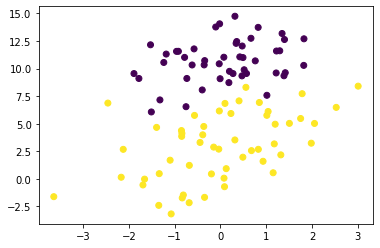

In [3]:
X1= datos.x1.values
X2= datos.x2.values
X= datos.iloc[:,:-1].values
Y= datos.y.values


plt.scatter(X1,X2,c=Y)
plt.show()

In [4]:
def separacionDatos(X,Y,tamanioTest=0.2):
  m= Y.size
  testTamanio = int(m*tamanioTest)
  indicesTest= np.random.choice(m,testTamanio)
  #setdiff1d regresa un vector con elementos que estan el parametro uno y no en el parametro dos
  indicesEntrenamiento = np.setdiff1d(np.arange(m),indicesTest)
  return X[indicesTest], Y[indicesTest], X[indicesEntrenamiento], Y[indicesEntrenamiento]

In [11]:
def sigmoide(X):
  return 1/(1+ np.exp(-X)) #El error estaba nada más y nada menos que aquí, faltaban los paréntesis

In [6]:
def funcionHipotesis(X,theta):
  return sigmoide(X@theta)

In [7]:
def funcionDeCosto(X, Y, theta):
  h= funcionHipotesis(X, theta)
  izq= -Y* np.log(h)
  der = -(1-Y)* np.log(1-h)
  j=sum(izq+der)
  return j

In [8]:
def gradienteCosto(X,Y,theta):
  m= Y.size
  h = funcionHipotesis(X, theta)
  dj= ((h-Y)@X) /m
  return dj

In [9]:
def gradienteDescenso(X,Y, alfa, E=0.001):
  m= Y.size
  X = np.hstack([np.ones([m,1]),X])
  n = X.shape[1]

  theta = np.zeros([n])


  costoAnterior= funcionDeCosto(X,Y,theta)
  theta = theta- alfa*gradienteCosto(X,Y,theta)
  costoActual= funcionDeCosto(X,Y,theta)

  diferencia = abs(costoAnterior - costoActual)

  iteraciones=[0,1]
  yCostos=[costoAnterior, costoActual]
  i=2

  while diferencia> E:
    costoAnterior= funcionDeCosto(X,Y,theta)
    theta = theta- alfa*gradienteCosto(X,Y,theta)
    costoActual= funcionDeCosto(X,Y,theta)

    diferencia = abs(costoAnterior - costoActual)

    iteraciones.append(i)
    yCostos.append(costoActual)
    i=i+1

  plt.plot(iteraciones, yCostos)
  plt.title("Costos vs Iteraciones")
  plt.xlabel("Iteraciones")
  plt.ylabel("Costo")

  print("Último costo:",yCostos[-1])
  plt.show()
  return theta


Último costo: 8.951551056010269


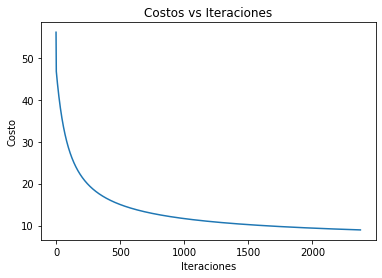

In [12]:
xTest, yTest, xEntrenamiento, yEntrenamiento = separacionDatos(X,Y)
alfa = 0.1
theta = gradienteDescenso(xEntrenamiento, yEntrenamiento, alfa)

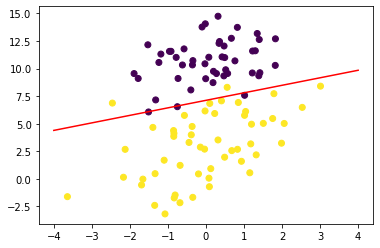

In [14]:
plt.scatter(X1,X2,c=Y)
x = np.linspace(-4, 4, 3)
y = - (theta[0] + x * theta[1]) / theta[2]
plt.plot(x, y, 'r')
plt.show()